## Patinaje en el CartPole

> **Problema**: Si Peter quiere escapar del lobo, necesita moverse más rápido que él. Veremos cómo Peter puede aprender a patinar, en particular, a mantener el equilibrio, utilizando Q-Learning.

Primero, instalemos el gym e importemos las bibliotecas necesarias:


In [1]:
#code block 1

## Crear un entorno de cartpole


In [ ]:
#code block 2

Para ver cómo funciona el entorno, ejecutemos una breve simulación de 100 pasos.


In [ ]:
#code block 3

Durante la simulación, necesitamos obtener observaciones para decidir cómo actuar. De hecho, la función `step` nos devuelve las observaciones actuales, la función de recompensa y la bandera `done` que indica si tiene sentido continuar la simulación o no:


In [ ]:
#code block 4

Podemos obtener el valor mínimo y máximo de esos números:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Exploremos también otro método de discretización utilizando intervalos:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Ahora ejecutemos una breve simulación y observemos esos valores discretos del entorno.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


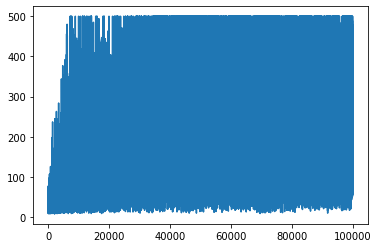

In [20]:
plt.plot(rewards)

De este gráfico, no es posible determinar nada, porque debido a la naturaleza del proceso de entrenamiento estocástico, la duración de las sesiones de entrenamiento varía enormemente. Para dar más sentido a este gráfico, podemos calcular el **promedio móvil** sobre una serie de experimentos, digamos 100. Esto se puede hacer convenientemente usando `np.convolve`:


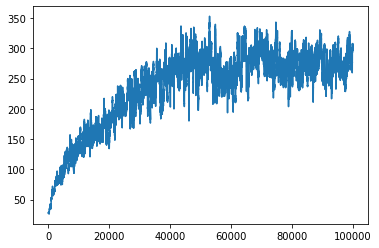

In [22]:
#code block 12

## Variando los hiperparámetros y viendo el resultado en acción

Ahora sería interesante ver cómo se comporta realmente el modelo entrenado. Ejecutemos la simulación, y seguiremos la misma estrategia de selección de acciones que durante el entrenamiento: muestreo según la distribución de probabilidad en la Q-Table:


In [23]:
# code block 13

## Guardar el resultado en un GIF animado

Si quieres impresionar a tus amigos, puedes enviarles la imagen animada en formato GIF del palo equilibrado. Para hacerlo, podemos usar `env.render` para generar un fotograma de imagen y luego guardar esos fotogramas en un GIF animado utilizando la biblioteca PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Descargo de responsabilidad**:  
Este documento ha sido traducido utilizando el servicio de traducción automática [Co-op Translator](https://github.com/Azure/co-op-translator). Si bien nos esforzamos por garantizar la precisión, tenga en cuenta que las traducciones automatizadas pueden contener errores o imprecisiones. El documento original en su idioma nativo debe considerarse la fuente autorizada. Para información crítica, se recomienda una traducción profesional realizada por humanos. No nos hacemos responsables de malentendidos o interpretaciones erróneas que puedan surgir del uso de esta traducción.
